<a href="https://colab.research.google.com/github/kdemertzis/EKPA/blob/main/CyberThreatHunting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# φόρτωση βιβλιοθηκών
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
%matplotlib inline

In [2]:
# έλεγχος κατανομής κλάσεων
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [3]:
# φόρτωση συνόλου δεδομένων
url = "https://raw.githubusercontent.com/nsethi31/Kaggle-Data-Credit-Card-Fraud-Detection/master/creditcard.csv"
data = pd.read_csv(url)

In [4]:
# διαγραφή κενών ή μη αριθμητικών τιμών
data = data.select_dtypes(include=['float64', 'int64']).dropna()

In [5]:
# διαχωρισμός ανεξάρτητων και εξαρτημένων μεταβλητών
## Μελετώντας το σύνολο δεδομένων στο Kaggle φαίνεται ότι η στήλη που αναπαριστά την ταξινόμηση κάθε στοιχείου ονομάζεται "Class"
X = data.drop("Class", axis = 1)
y = data["Class"]

In [6]:
# διαχωρισμός συνόλου δεδομένων σε σύνολο εκπαίδευσης και δοκιμών
## Ως συνήθως επιλέγεται μέγεθος test set το 20% του συνόλου
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<ipython-input-7-2cc9637182c3>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(data['Class'], sort = True)


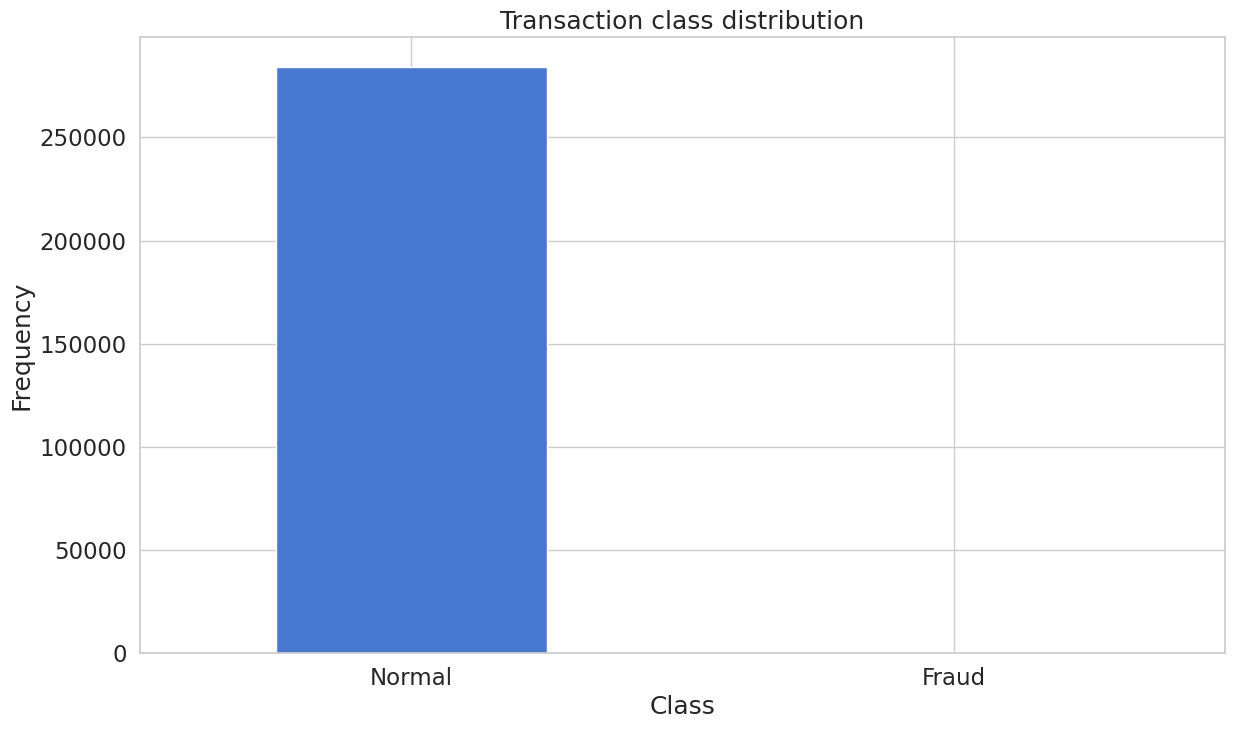

In [7]:
# κατανομή της εξαρτημένης μεταβλητής (class)
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [8]:
# δημιουργία Random Forest αλγορίθμου
clf = RandomForestClassifier()

In [9]:
# εκπαίδευση αλγόριθμου
clf.fit(X_train, y_train)

RandomForestClassifier()

In [10]:
# πρόβλεψη συνόλου δοκιμής
predictions = clf.predict(X_test)

Accuracy:  0.9996313331694814
Precision:  0.9886363636363636
Recall:  0.8130841121495327
F1:  0.8923076923076922


<Axes: >

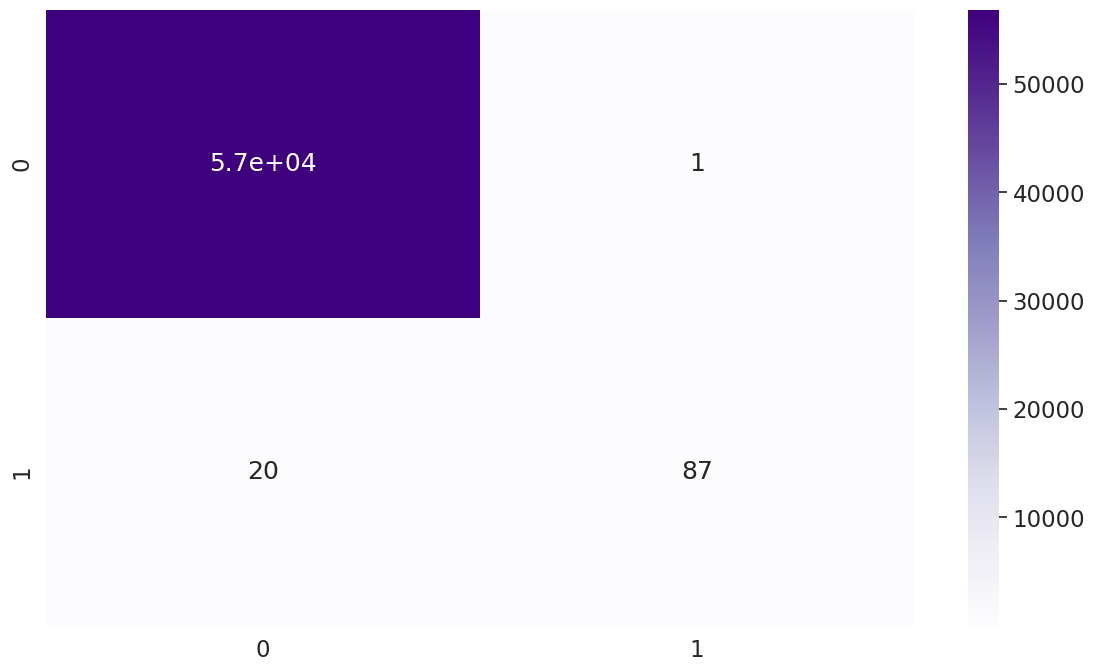

In [11]:
# υπολογισμός μετρικών αξιολόγησης (accuracy, precision, recall, f-score, confusion matrix)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1: ", f1)
cnfm = confusion_matrix(y_test, predictions)
sns.heatmap(cnfm, annot = True, cmap = "Purples")